In [143]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

In [144]:
base_dir = Path("../data_out/default_finn")
u_ret = np.load(base_dir / "u_ret.npy")
ret_freundlich = np.load(base_dir / "retardation_linear.npy")

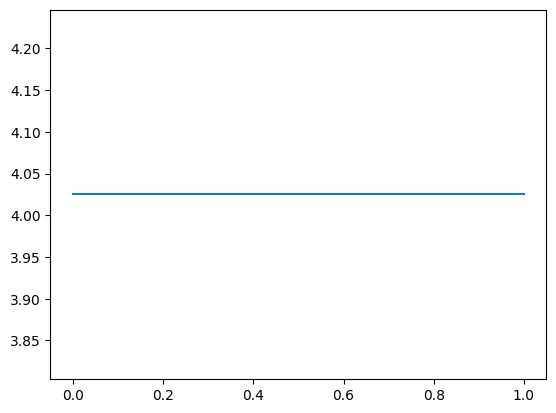

In [145]:
plt.plot(u_ret, ret_freundlich, "-")
# plt.ylim(3, 5)
plt.show()

(251, 26)

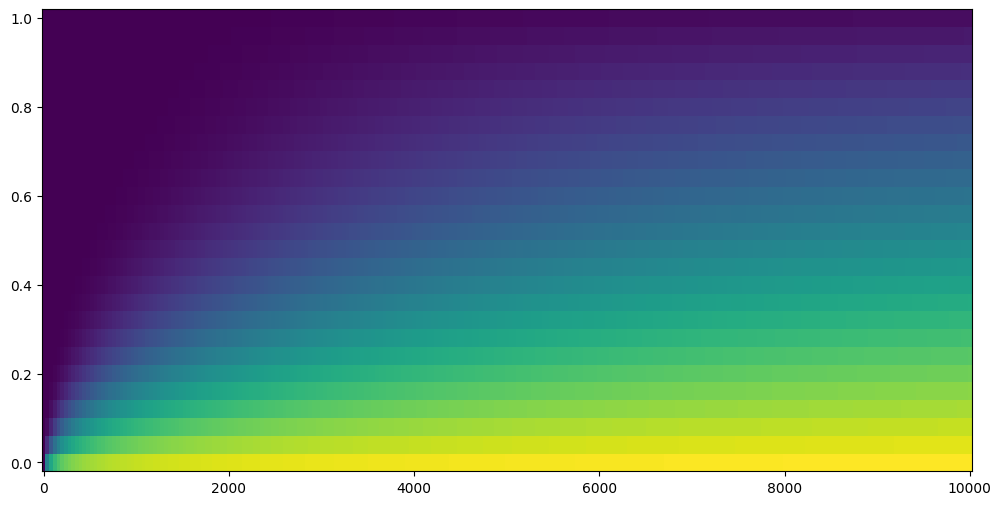

In [146]:
# c_full = np.load(Path("../data/synthetic_data/retardation_freundlich/c_train.npy"))[:251, 0, :]
c_full = np.load(Path("../data/synthetic_data/retardation_linear/c_train.npy"))[:251, 0, :]

Nt,  Nx = c_full.shape 
x = np.linspace(0, 1, Nx)
t = np.linspace(0, 10000, Nt)

plt.figure(figsize=(12, 6))
plt.pcolormesh(t, x, c_full.T)
c_full.shape

# Compute derivatives to compute R(c) from equation
$$
\frac{\partial c}{\partial t} = \frac{D}{R(c)} \frac{\partial^2 c}{\partial x^2}
$$

In [147]:
c_full.shape

(251, 26)

In [148]:
dcdt = (c_full[2:] - c_full[:-2]) / (2*Nt)
d2cdx2 = (c_full[..., 2:] - 2 * c_full[..., 1:-1] + c_full[..., :-2]) / Nt**2

# dcdt = np.concatenate([np.zeros((1, Nx)), dcdt, np.zeros((1, Nx))], axis=0)
# d2cdx2 = np.concatenate([d2cdx2[:, 0:1], d2cdx2, d2cdx2[:, -1:]], axis=1)
dcdt = dcdt[:, 1:-1]
d2cdx2 = d2cdx2[1:-1, :]
print(dcdt.shape, d2cdx2.shape)

(249, 24) (249, 24)


In [149]:
print(dcdt.min(), dcdt.max())
print(d2cdx2.min(), d2cdx2.max())

3.6970097150066845e-25 0.0005166097811471874
3.3837434320823066e-33 3.173568772581169e-06


In [150]:
print(np.isnan(dcdt).any())
print(np.isnan(d2cdx2).any())
print(np.any(np.isinf(dcdt)))
print(np.any(np.isinf(d2cdx2)))

False
False
False
False


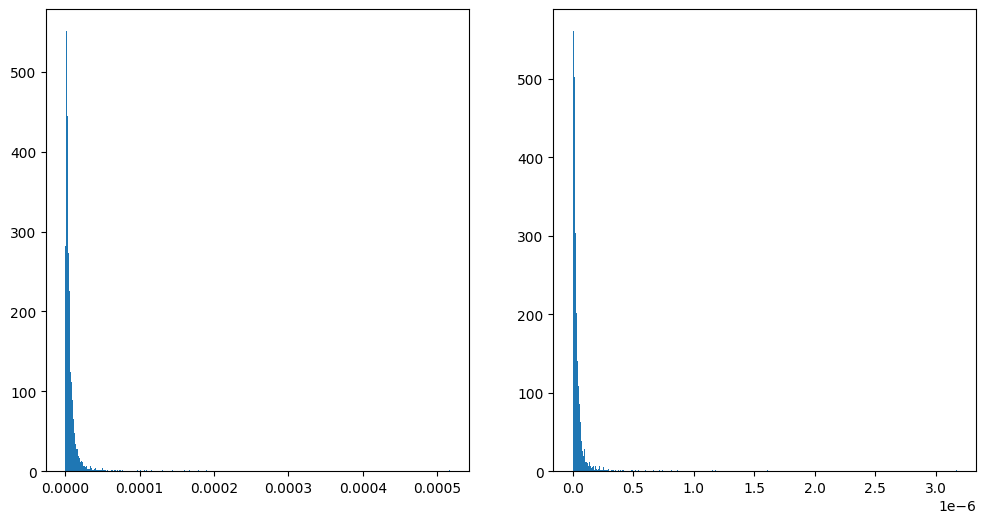

In [151]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(dcdt.ravel(), bins=1000)
plt.subplot(1, 2, 2)
plt.hist(d2cdx2.ravel(), bins=1000)
plt.show()

In [152]:
ret = d2cdx2 / dcdt
ret.shape

(249, 24)

In [153]:
full_mask = (~np.isnan(ret)) * (~np.isinf(ret))# * (np.abs(ret) < 5)
rets_without_outliers = ret[full_mask].ravel()
rets_without_outliers.min(), rets_without_outliers.max(), len(rets_without_outliers)

(9.152649554441835e-09, 0.009339354565414288, 5976)

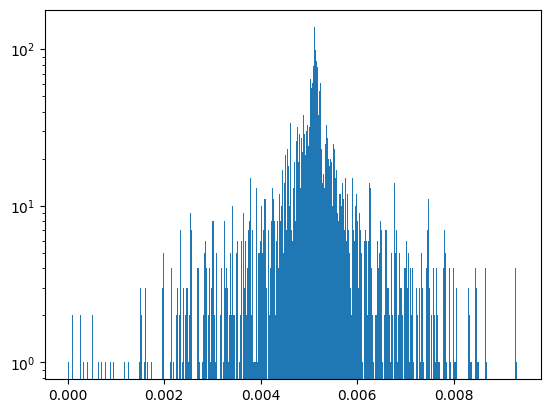

In [154]:
plt.hist(rets_without_outliers, bins=1000)#, density=True)
plt.yscale("log")
# plt.ylim(0, 100)
plt.show()

In [155]:
print("# of bad values:", (~full_mask).sum(), "out of", full_mask.size)

# of bad values: 0 out of 5976


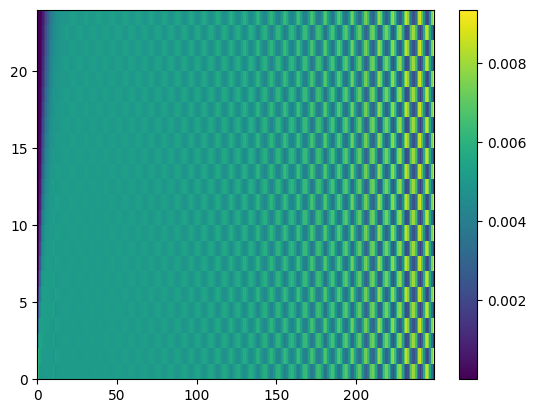

In [156]:
ret_with_bad_values_filled = ret.copy()
ret_with_bad_values_filled[~full_mask] = -6

plt.colorbar(plt.pcolormesh(ret_with_bad_values_filled.T))

This is R(c(t,x)). But I want R(c). If I go over c(t,x) and make a map I get R(c)

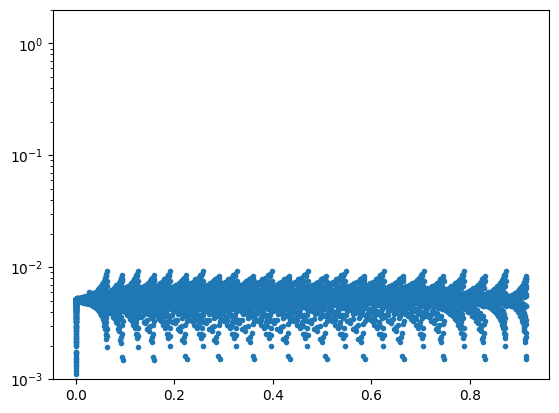

In [157]:
c_no_borders = c_full[1:-1, 1:-1]
# c_ret = c_no_borders[full_mask].ravel()
# r_ret = ret[full_mask].ravel()
# plt.plot(c_ret, r_ret, ".")
plt.plot(c_no_borders.ravel(), ret.ravel(), ".")
# plt.ylim(8e-3, 2)
plt.ylim(1e-3, 2)
plt.yscale("log")
plt.show()

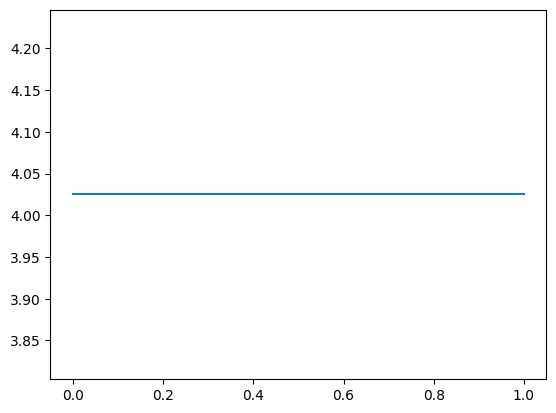

In [158]:
plt.plot(u_ret, ret_freundlich, "-")